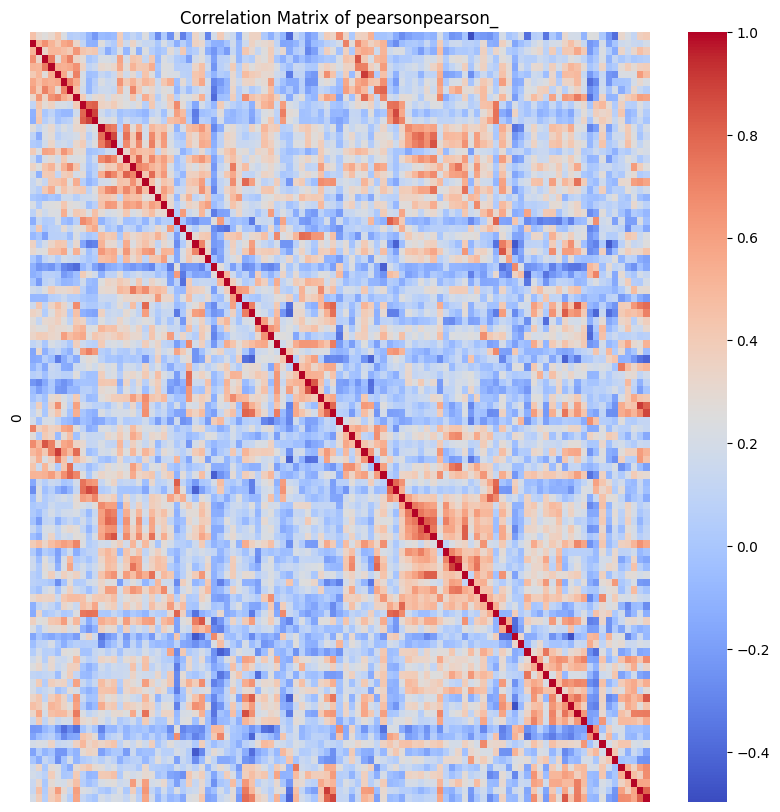

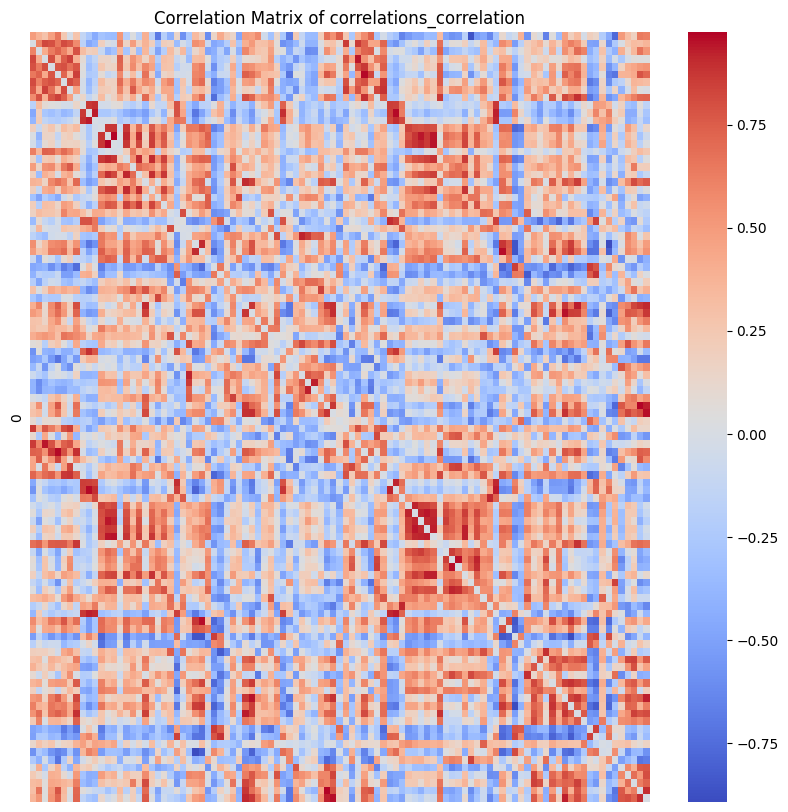

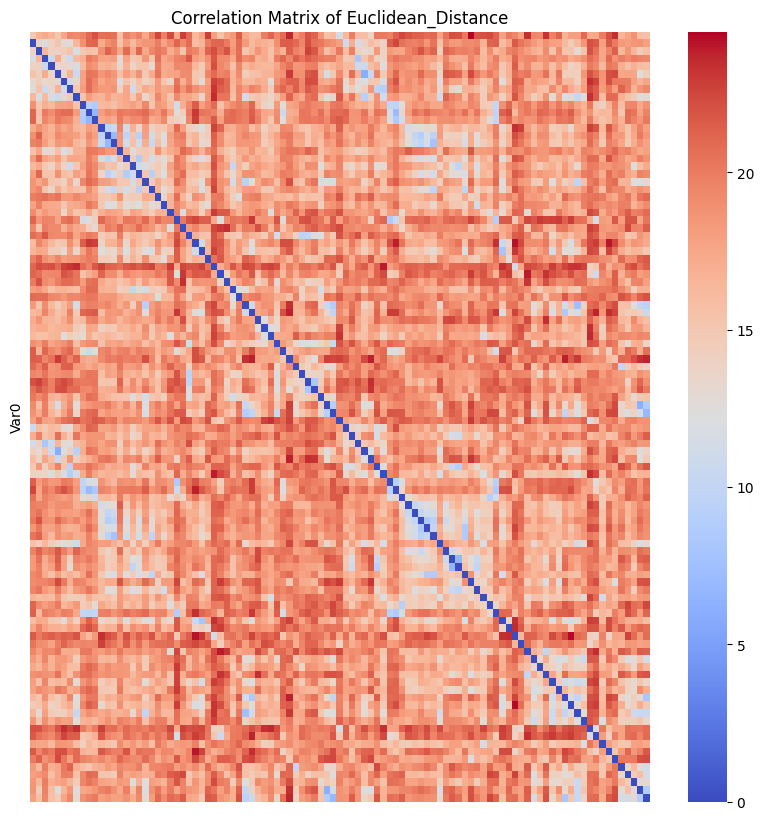

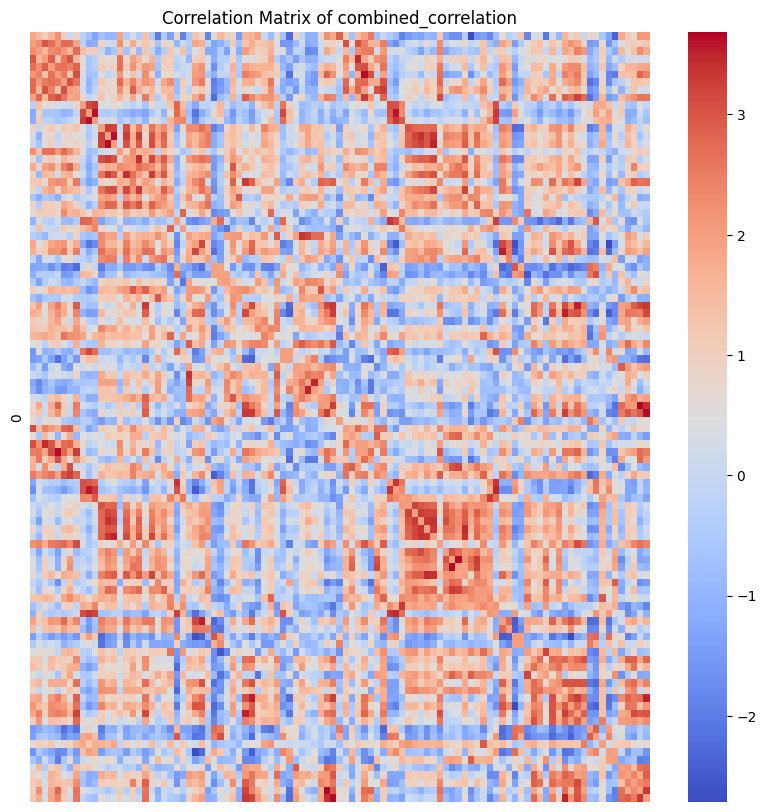

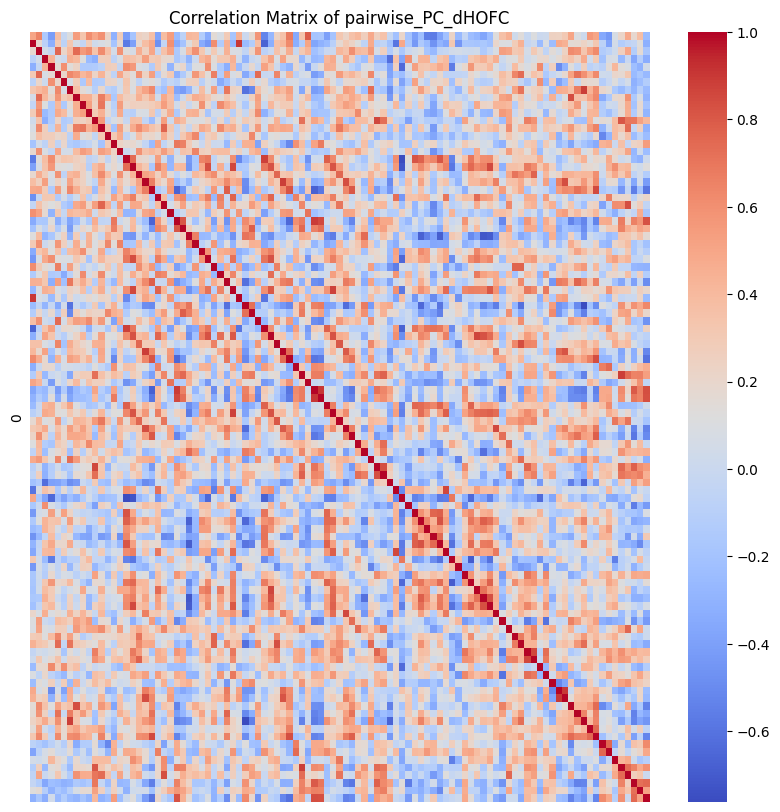

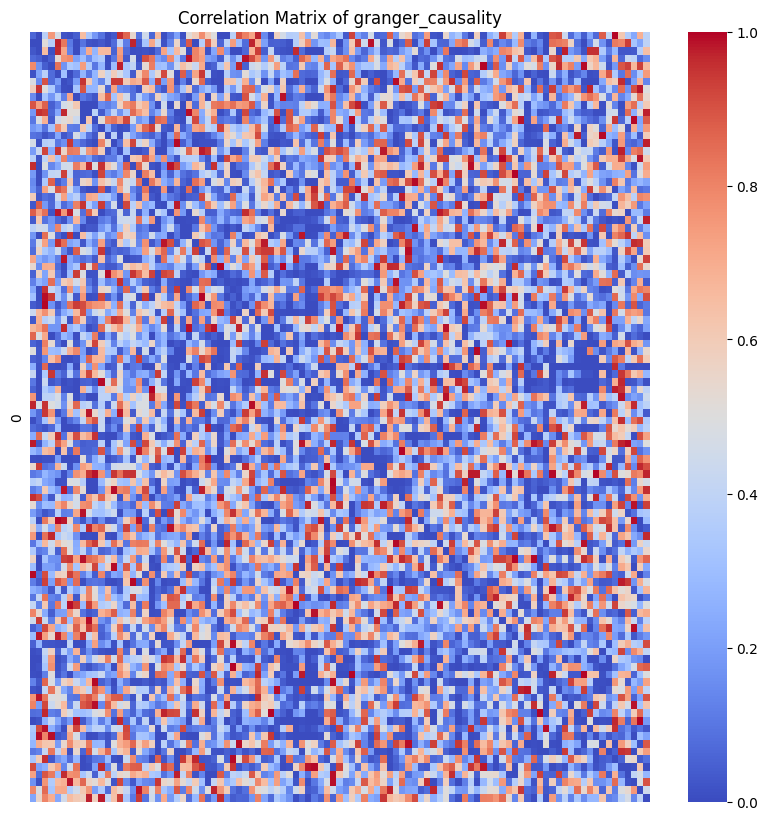

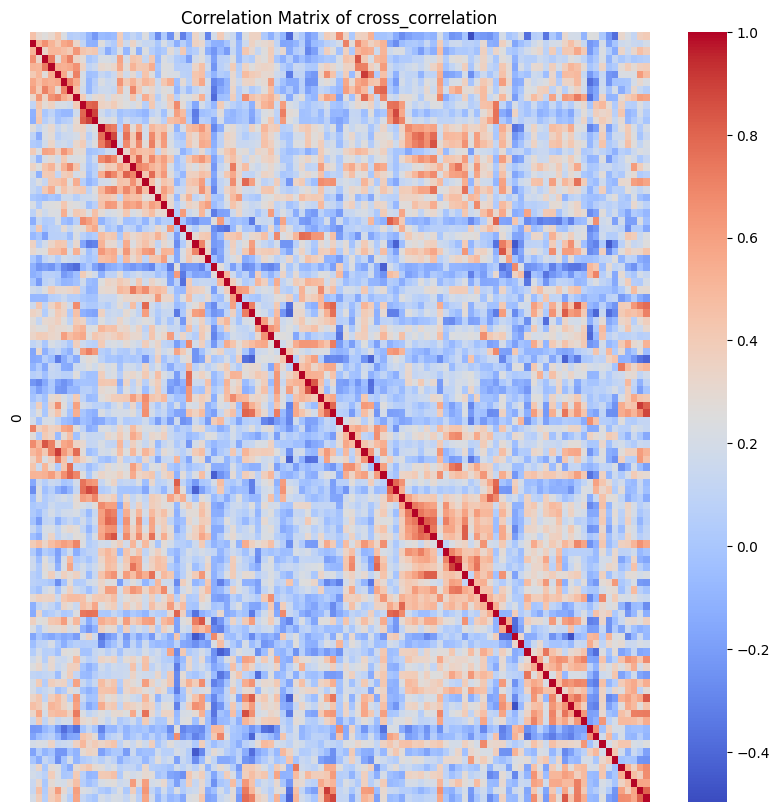

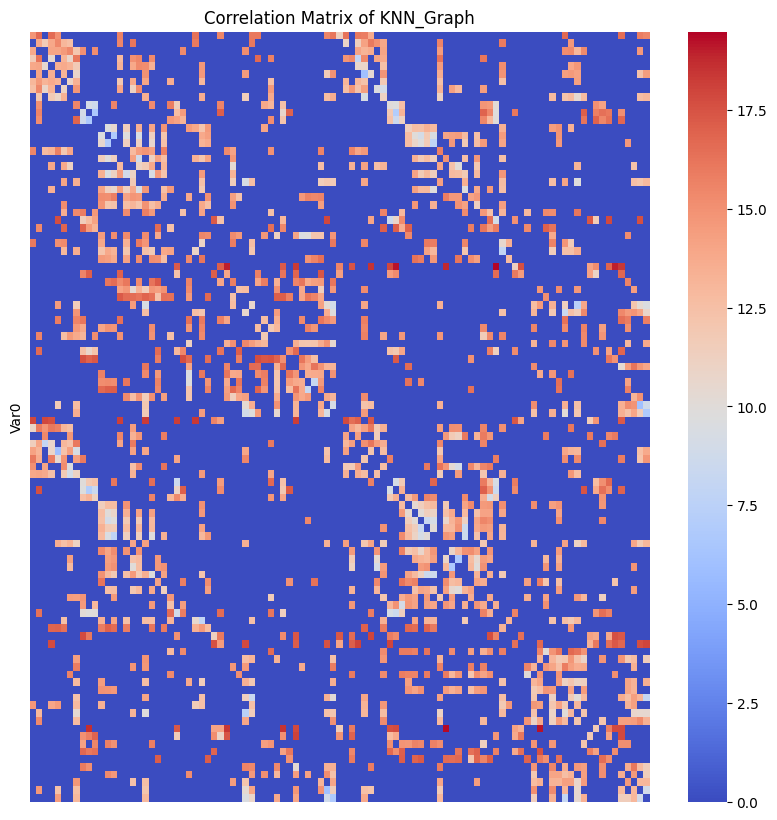

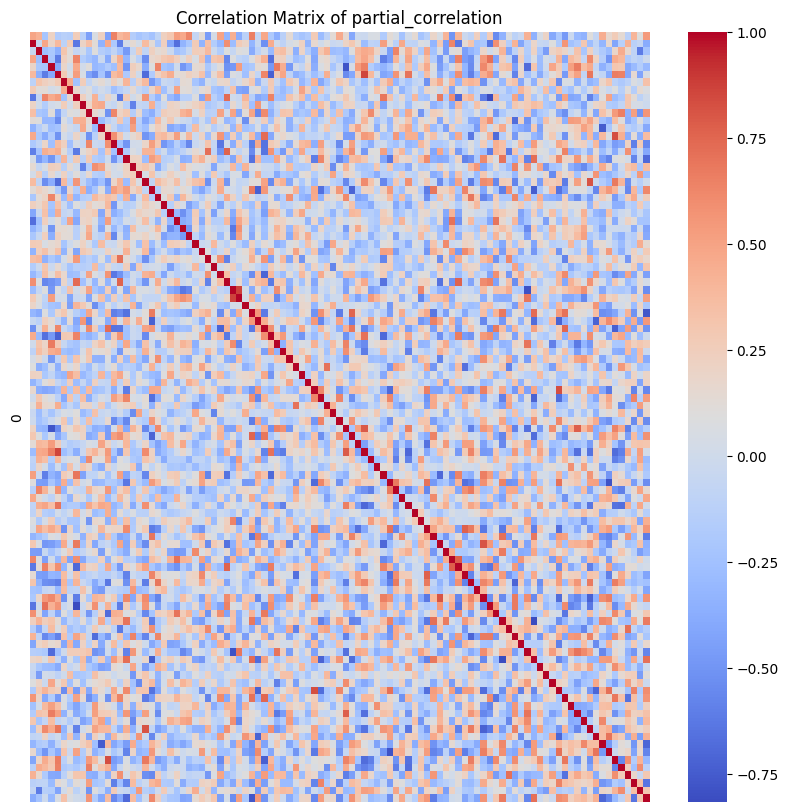

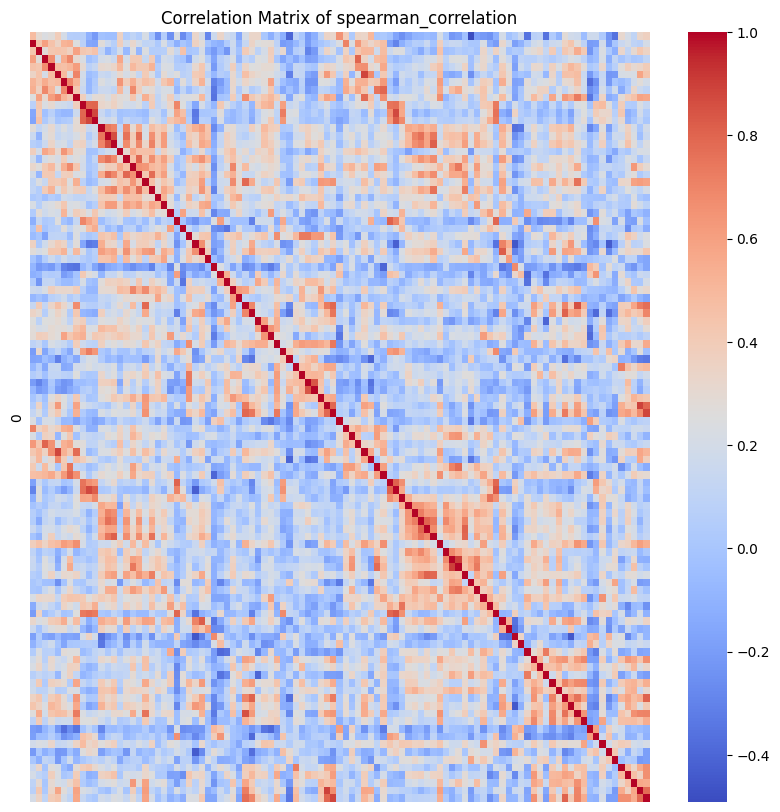

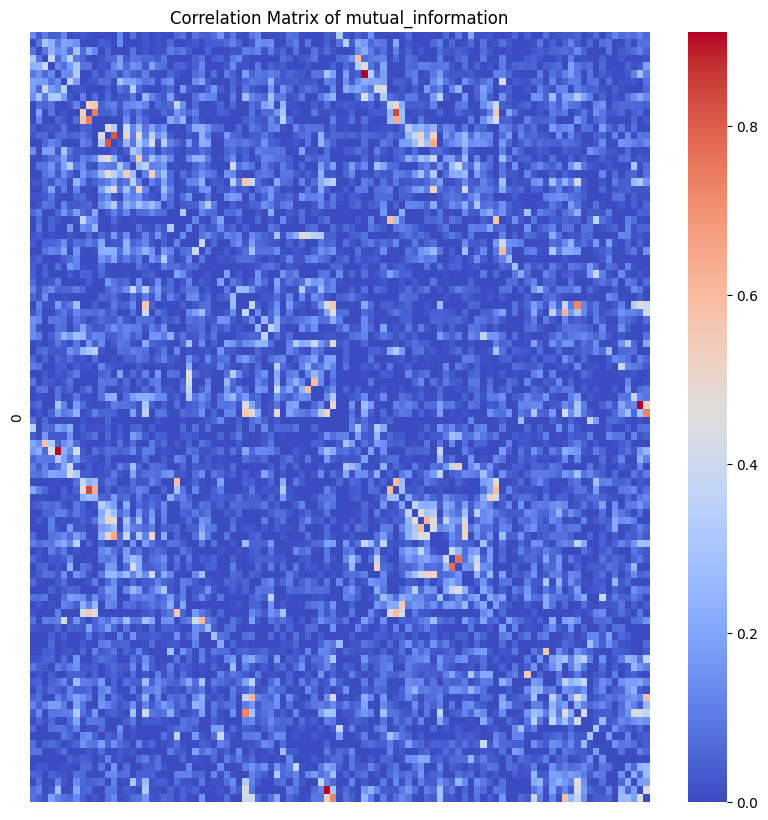

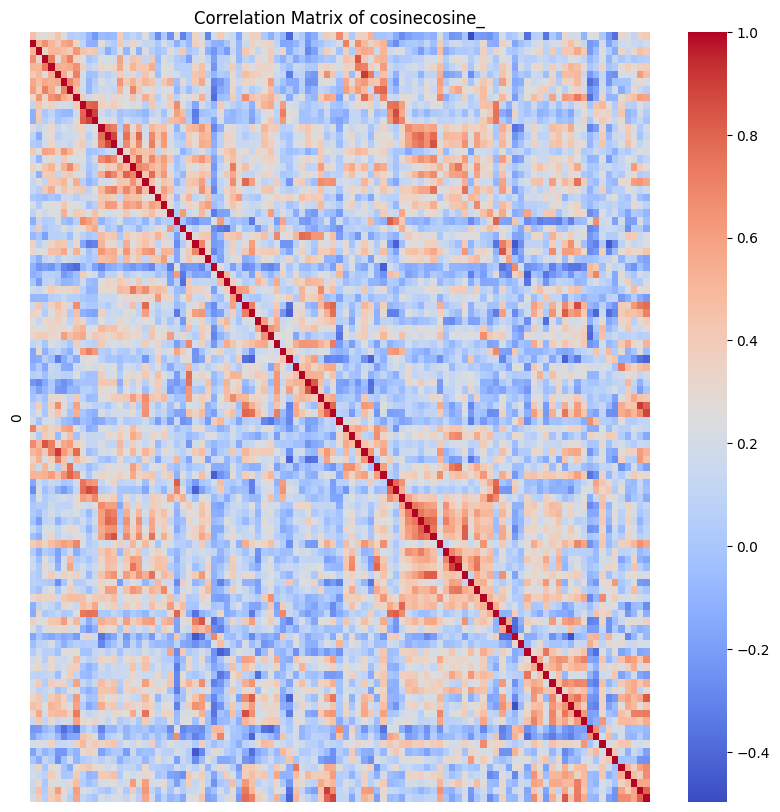

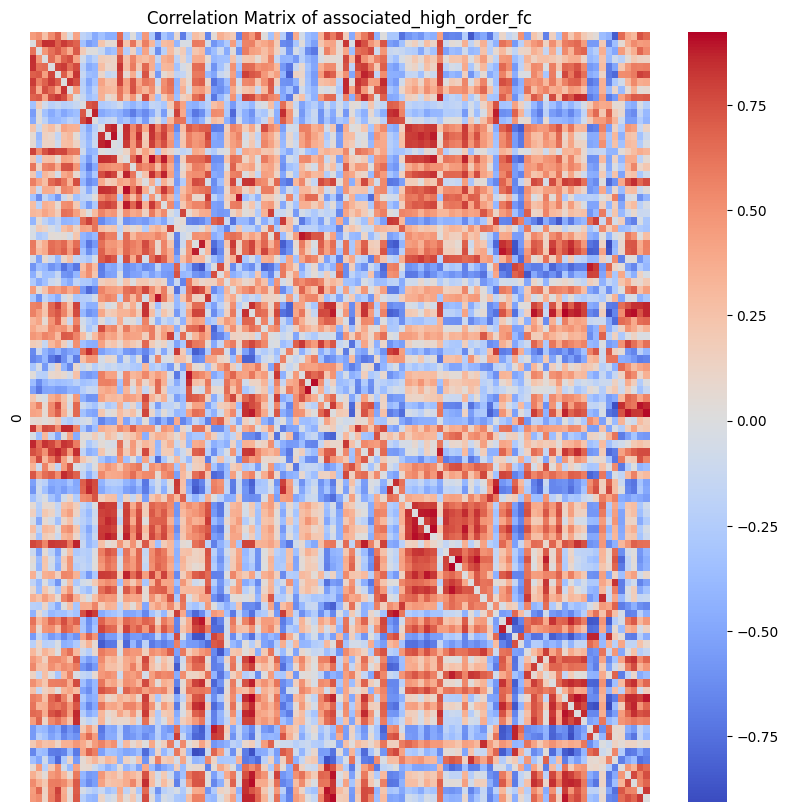

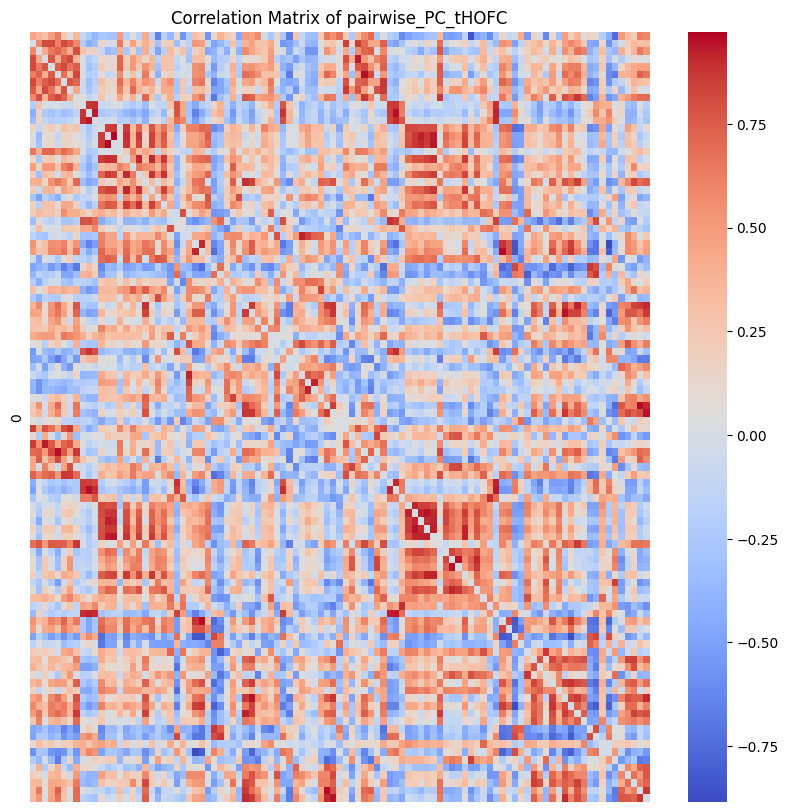

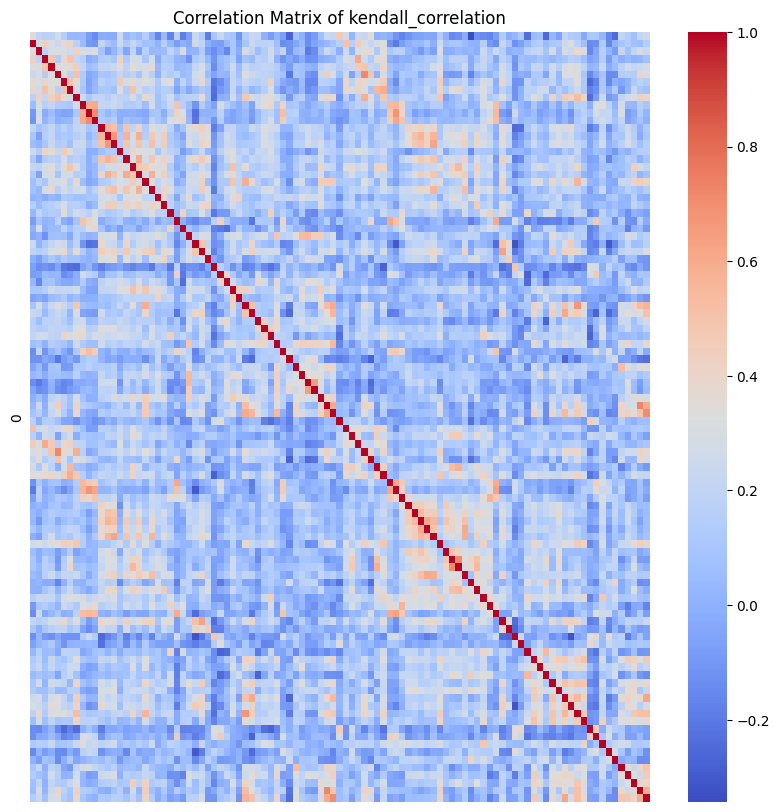

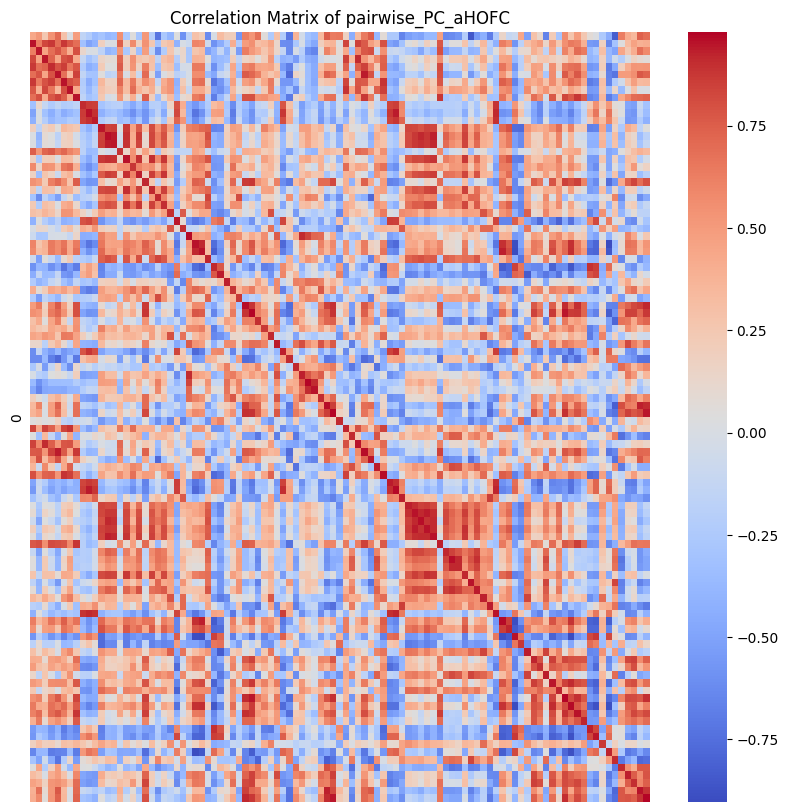

Folder: pearsonpearson_, First File: pearsonpearson_1.csv
Folder: correlations_correlation, First File: correlations_correlation1.csv
Folder: Euclidean_Distance, First File: distance_matrix_1.csv
Folder: combined_correlation, First File: combined_correlation1.csv
Folder: pairwise_PC_dHOFC, First File: dHOFC1.csv
Folder: granger_causality, First File: granger_causality1.csv
Folder: cross_correlation, First File: cross_correlation1.csv
Folder: KNN_Graph, First File: knn_graph_1.csv
Folder: partial_correlation, First File: partial_correlation1.csv
Folder: spearman_correlation, First File: spearman_correlation1.csv
Folder: mutual_information, First File: mutual_information1.csv
Folder: cosinecosine_, First File: cosinecosine_1.csv
Folder: associated_high_order_fc, First File: associated_high_order_fc1.csv
Folder: pairwise_PC_tHOFC, First File: tHOFC1.csv
Folder: kendall_correlation, First File: kendall_correlation1.csv
Folder: pairwise_PC_aHOFC, First File: aHOFC1.csv


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot correlation matrix
def plot_correlation_matrix(correlation_matrix, method=""):
    plt.figure(figsize=(10, 10))
    sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", xticklabels=False, yticklabels=False)
    plt.title("Correlation Matrix" + " of " + method)
    plt.show()    

# Dictionary to store folder names and their corresponding first files
folder_first_file = {}

# Get the current working directory
current_directory = os.getcwd()

# Modify the path to point to the specific data directory
current_directory = os.path.join(current_directory, "../../data/ADNI/fmri_edge")

# Iterate through all items in the current directory
for item in os.listdir(current_directory):
    item_path = os.path.join(current_directory, item)

    # Check if the item is a directory
    if os.path.isdir(item_path):
        # Get all files in the directory, sort them alphabetically
        files = sorted(os.listdir(item_path))

        # Ensure there is at least one file in the directory
        if files:
            # Select the alphabetically first file
            first_file = files[0]
            first_file_path = os.path.join(item_path, first_file)

            # Record the folder and file names
            folder_first_file[item] = first_file

            # Visualization code
            try:
                # Assume the file is a .csv or .npy file with the correlation matrix
                if first_file.endswith('.csv'):
                    correlation_matrix = pd.read_csv(first_file_path, index_col=0)
                elif first_file.endswith('.npy'):
                    correlation_matrix = np.load(first_file_path)
                else:
                    print(f"Unsupported file format: {first_file}")
                    continue

                # Plot the correlation matrix
                plot_correlation_matrix(correlation_matrix, method=item)

            except Exception as e:
                print(f"Error processing file {first_file_path}: {e}")

# Print out the dictionary of folder names and first files
for folder, first_file in folder_first_file.items():
    print(f"Folder: {folder}, First File: {first_file}")
